<h2><a href="https://leetcode.com/problems/evaluate-division">399. Evaluate Division</a></h2><h3>Medium</h3><hr><p>You are given an array of variable pairs <code>equations</code> and an array of real numbers <code>values</code>, where <code>equations[i] = [A<sub>i</sub>, B<sub>i</sub>]</code> and <code>values[i]</code> represent the equation <code>A<sub>i</sub> / B<sub>i</sub> = values[i]</code>. Each <code>A<sub>i</sub></code> or <code>B<sub>i</sub></code> is a string that represents a single variable.</p>

<p>You are also given some <code>queries</code>, where <code>queries[j] = [C<sub>j</sub>, D<sub>j</sub>]</code> represents the <code>j<sup>th</sup></code> query where you must find the answer for <code>C<sub>j</sub> / D<sub>j</sub> = ?</code>.</p>

<p>Return <em>the answers to all queries</em>. If a single answer cannot be determined, return <code>-1.0</code>.</p>

<p><strong>Note:</strong> The input is always valid. You may assume that evaluating the queries will not result in division by zero and that there is no contradiction.</p>

<p><strong>Note:&nbsp;</strong>The variables that do not occur in the list of equations are undefined, so the answer cannot be determined for them.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input:</strong> equations = [[&quot;a&quot;,&quot;b&quot;],[&quot;b&quot;,&quot;c&quot;]], values = [2.0,3.0], queries = [[&quot;a&quot;,&quot;c&quot;],[&quot;b&quot;,&quot;a&quot;],[&quot;a&quot;,&quot;e&quot;],[&quot;a&quot;,&quot;a&quot;],[&quot;x&quot;,&quot;x&quot;]]
<strong>Output:</strong> [6.00000,0.50000,-1.00000,1.00000,-1.00000]
<strong>Explanation:</strong> 
Given: <em>a / b = 2.0</em>, <em>b / c = 3.0</em>
queries are: <em>a / c = ?</em>, <em>b / a = ?</em>, <em>a / e = ?</em>, <em>a / a = ?</em>, <em>x / x = ? </em>
return: [6.0, 0.5, -1.0, 1.0, -1.0 ]
note: x is undefined =&gt; -1.0</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> equations = [[&quot;a&quot;,&quot;b&quot;],[&quot;b&quot;,&quot;c&quot;],[&quot;bc&quot;,&quot;cd&quot;]], values = [1.5,2.5,5.0], queries = [[&quot;a&quot;,&quot;c&quot;],[&quot;c&quot;,&quot;b&quot;],[&quot;bc&quot;,&quot;cd&quot;],[&quot;cd&quot;,&quot;bc&quot;]]
<strong>Output:</strong> [3.75000,0.40000,5.00000,0.20000]
</pre>

<p><strong class="example">Example 3:</strong></p>

<pre>
<strong>Input:</strong> equations = [[&quot;a&quot;,&quot;b&quot;]], values = [0.5], queries = [[&quot;a&quot;,&quot;b&quot;],[&quot;b&quot;,&quot;a&quot;],[&quot;a&quot;,&quot;c&quot;],[&quot;x&quot;,&quot;y&quot;]]
<strong>Output:</strong> [0.50000,2.00000,-1.00000,-1.00000]
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= equations.length &lt;= 20</code></li>
	<li><code>equations[i].length == 2</code></li>
	<li><code>1 &lt;= A<sub>i</sub>.length, B<sub>i</sub>.length &lt;= 5</code></li>
	<li><code>values.length == equations.length</code></li>
	<li><code>0.0 &lt; values[i] &lt;= 20.0</code></li>
	<li><code>1 &lt;= queries.length &lt;= 20</code></li>
	<li><code>queries[i].length == 2</code></li>
	<li><code>1 &lt;= C<sub>j</sub>.length, D<sub>j</sub>.length &lt;= 5</code></li>
	<li><code>A<sub>i</sub>, B<sub>i</sub>, C<sub>j</sub>, D<sub>j</sub></code> consist of lower case English letters and digits.</li>
</ul>


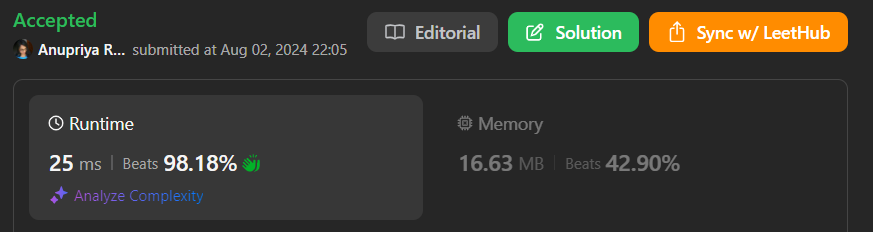

In [19]:
from collections import defaultdict
from typing import List

class Solution:
    def calcEquation(self, equations: List[List[str]], values: List[float], queries: List[List[str]]) -> List[float]:
        adj = defaultdict(list)

        for (u, v), value in zip(equations, values):
            adj[u].append([value, v])
            adj[v].append([1/value, u])

        print(f"adj:{adj}")
        def dfs(node, destination, visit):
            if node == destination:
                return 1.0
            visit.add(node)
            print(f"node: {node}")
            
            for value, child in adj[node]:
                print(f"value: {value} |  child : {child} |  visited : {(child in visit)}")

                if child not in visit:
                    product = dfs(child, destination, visit,)
                    print(f"product : {product}")
                    if product != -1:
                        product = product * value
                        print(f"calculated product : {product}")
                        return product
            visit.remove(node)
            return -1.0

        
        result = []
        for source, destination in queries:
            if source not in adj or destination not in adj:
                result.append(float(-1))
            elif source == destination:
                result.append(float(1))
            else:
                print(f"=====================")
                result.append(dfs(source, destination, set()))

        return result

In [20]:
equations = [["a","b"],["b","c"]]
values = [2.0,3.0]
queries = [["a","c"],["b","a"],["a","e"],["a","a"],["x","x"]]

sol = Solution()
print(sol.calcEquation(equations, values, queries))

adj:defaultdict(<class 'list'>, {'a': [[2.0, 'b']], 'b': [[0.5, 'a'], [3.0, 'c']], 'c': [[0.3333333333333333, 'b']]})
node: a
value: 2.0 |  child : b |  visited : False
node: b
value: 0.5 |  child : a |  visited : True
value: 3.0 |  child : c |  visited : False
product : 1.0
calculated product : 3.0
product : 3.0
calculated product : 6.0
node: b
value: 0.5 |  child : a |  visited : False
product : 1.0
calculated product : 0.5
[6.0, 0.5, -1.0, 1.0, -1.0]
